In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [18]:
# Load the image and convert it to RGB format
image_path = './image2.png'
image = Image.open(image_path).convert("RGB")
image_array = np.array(image)
original_shape = image_array.shape

# Reshape the image array to a 2D array where each row is a pixel (R, G, B)
pixels = image_array.reshape(-1, 3)

In [19]:
# Apply Gaussian Mixture Model (GMM) clustering in RGB space using EM
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, covariance_type='tied', random_state=42)
gmm.fit(pixels)

# Get the cluster centers
cluster_centers = gmm.means_.astype(int)

# Assign each pixel to the cluster with the highest responsibility
labels = gmm.predict(pixels)

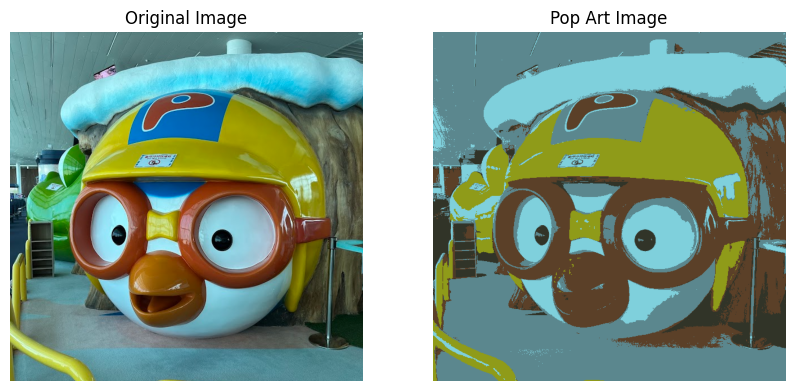

In [20]:
# Replace each pixel with its corresponding cluster center to create Pop Art effect
pop_art_pixels = cluster_centers[labels]
pop_art_image = pop_art_pixels.reshape(original_shape)

# Display the original and Pop Art images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(pop_art_image)
plt.title("Pop Art Image")
plt.axis("off")

plt.show()